# Unsupervised learning
**Unsupervised learning** is a branch of machine learning that deals with unlabeled data. Unlike supervised learning, where the data is labeled with a specific category or outcome, unsupervised learning algorithms are tasked with finding patterns and relationships within the data without any prior knowledge of the data’s meaning.

#### Working of Unsupervised Learning:

**Input of Data :**
1. Unstructured data
2. Unlabebled data

### Unsupervised Learning Algorithms

There are mainly 3 types of Algorithms which are used for Unsupervised dataset.

*   Clustering
    
*   Association Rule Learning
    
*   Dimensionality Reduction

#### **Clustering**

Clustering in unsupervised machine learning is the process of grouping unlabeled data into clusters based on their similarities. The goal of clustering is to identify patterns and relationships in the data without any prior knowledge of the data’s meaning.Some common clustering algorithms

* K-means Clustering: Partitioning Data into K Clusters
    
* Hierarchical Clustering: Building a Hierarchical Structure of Clusters
    
* Density-Based Clustering (DBSCAN): Identifying Clusters Based on Density
    
* Mean-Shift Clustering: Finding Clusters Based on Mode Seeking
    
* Spectral Clustering: Utilizing Spectral Graph Theory for Clustering
    

**Association Rule Learning**

Association rule learning is also known as association rule mining is a common technique used to discover associations in unsupervised machine learning. This technique is a rule-based ML technique that finds out some very useful relations between parameters of a large data set.

* Apriori Algorithm: A Classic Method for Rule Induction
    
* FP-Growth Algorithm: An Efficient Alternative to Apriori
    
* Eclat Algorithm: Exploiting Closed Itemsets for Efficient Rule Mining
    
* Efficient Tree-based Algorithms: Handling Large Datasets with Scalability
    

**Dimensionality Reduction**

Dimensionality reduction is the process of reducing the number of features in a dataset while preserving as much information as possible. This technique is useful for improving the performance of machine learning algorithms and for data visualization.

* Principal Component Analysis (PCA): Linear Transformation for Reduced Dimensions
    
* Linear Discriminant Analysis (LDA): Dimensionality Reduction for Discrimination
    
* Non-negative Matrix Factorization (NMF): Decomposing Data into Non-negative Components
    
* Locally Linear Embedding (LLE): Preserving Local Geometry in Reduced Dimensions
    
* Isomap: Capturing Global Relationships in Reduced Dimensions
    

#### Applications of Unsupervised learning
 
*   **Customer segmentation:** Unsupervised learning can be used to segment customers into groups based on their demographics, behavior, or preferences. This can help businesses to better understand their customers and target them with more relevant marketing campaigns.
    
*   **Fraud detection:** Unsupervised learning can be used to detect fraud in financial data by identifying transactions that deviate from the expected patterns. This can help to prevent fraud by flagging these transactions for further investigation.
    
*   **Recommendation systems:** Unsupervised learning can be used to recommend items to users based on their past behavior or preferences. For example, a recommendation system might use unsupervised learning to identify users who have similar taste in movies, and then recommend movies that those users have enjoyed.
    
*   **Natural language processing (NLP):** Unsupervised learning is used in a variety of NLP tasks, including topic modeling, document clustering, and part-of-speech tagging.
    
*   **Image analysis:** Unsupervised learning is used in a variety of image analysis tasks, including image segmentation, object detection, and image pattern recognition.

# Practicing This with a Dataset

We have a wine dataset, Intially we try to plot 2-d and 3-d plots to figure out cluster, and in the end we use PCA for a more defined cluster.

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
df.columns
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)


In [6]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_


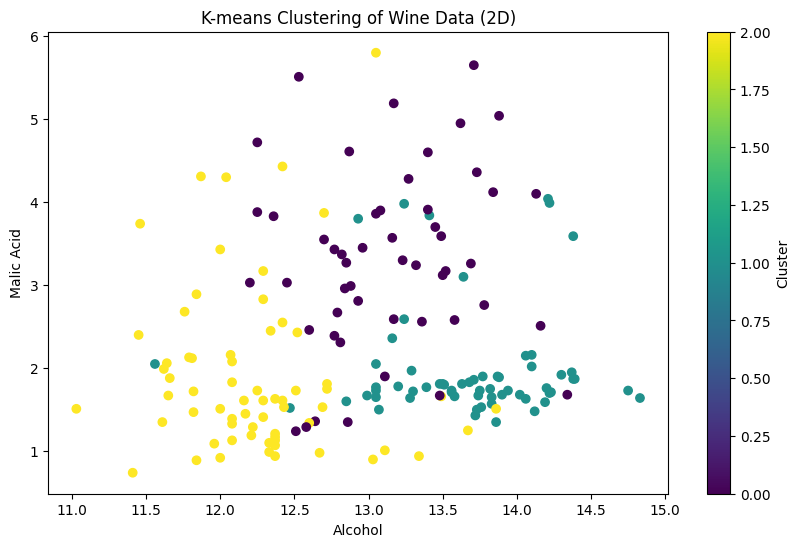

In [7]:
# 2D plot using 'Alcohol' and 'Malic_Acid'
plt.figure(figsize=(10, 6))
plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means Clustering of Wine Data (2D)')
plt.colorbar(label='Cluster')
plt.show()


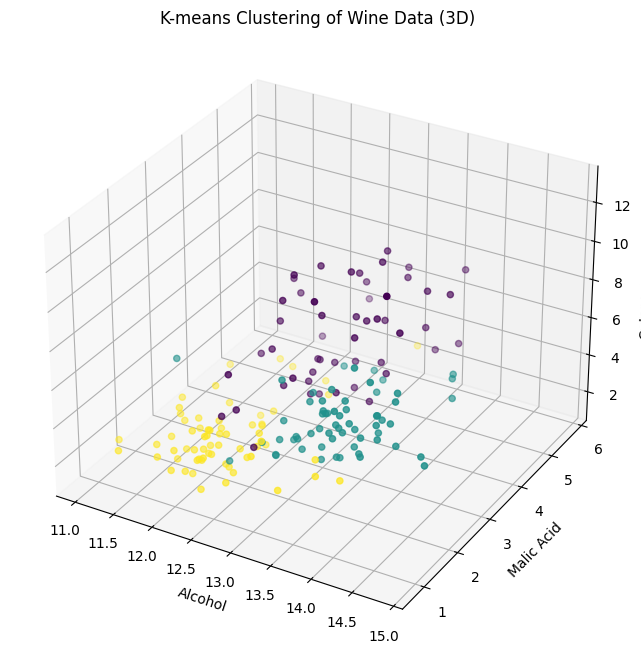

In [8]:
# 3D plot using 'Alcohol', 'Malic_Acid', and 'Color_Intensity'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Alcohol'], df['Malic_Acid'], df['Color_Intensity'], c=df['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Malic Acid')
ax.set_zlabel('Color Intensity')
ax.set_title('K-means Clustering of Wine Data (3D)')
plt.show()


We use the **Elbow method** for finding out the appropriate value of k otherwise we generally assume it.

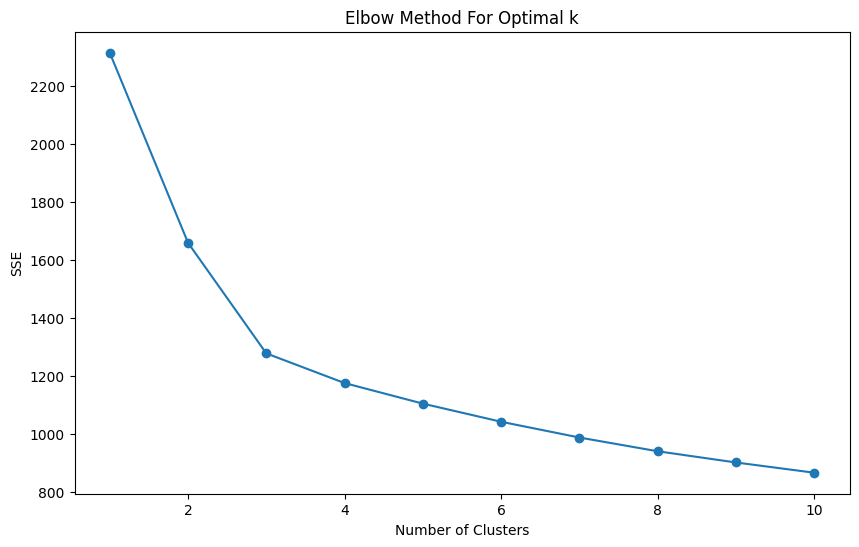

In [11]:
# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()


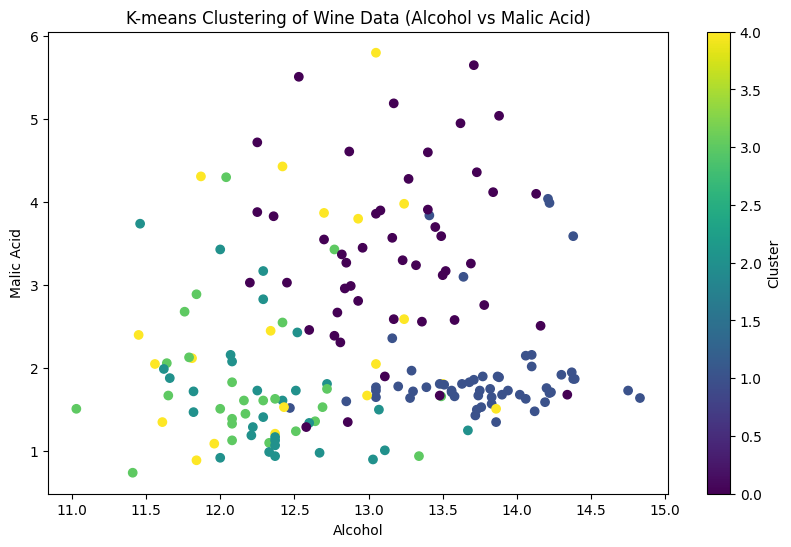

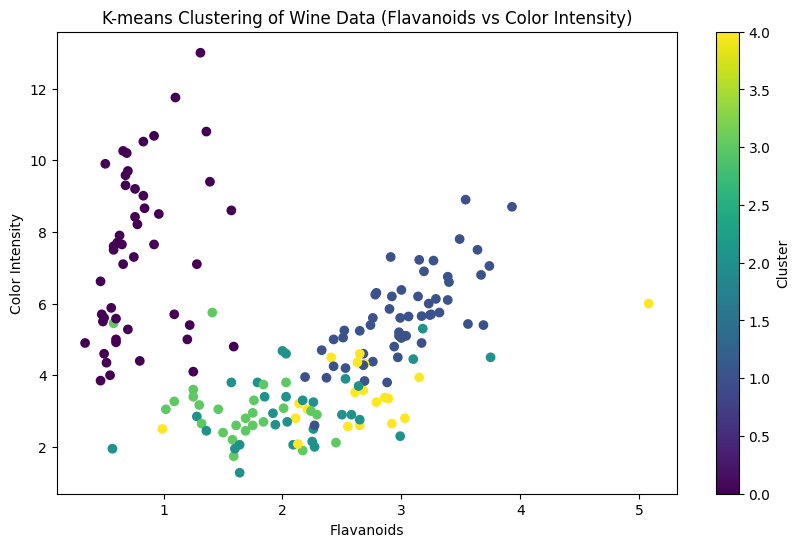

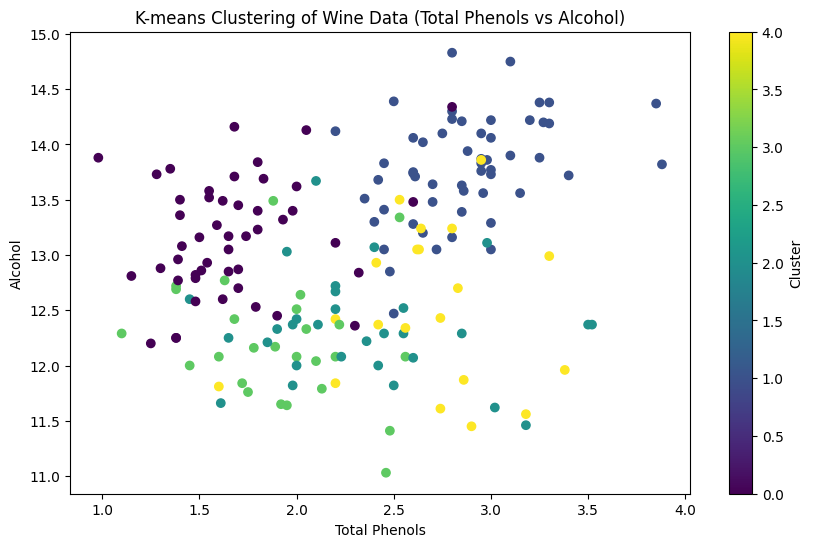

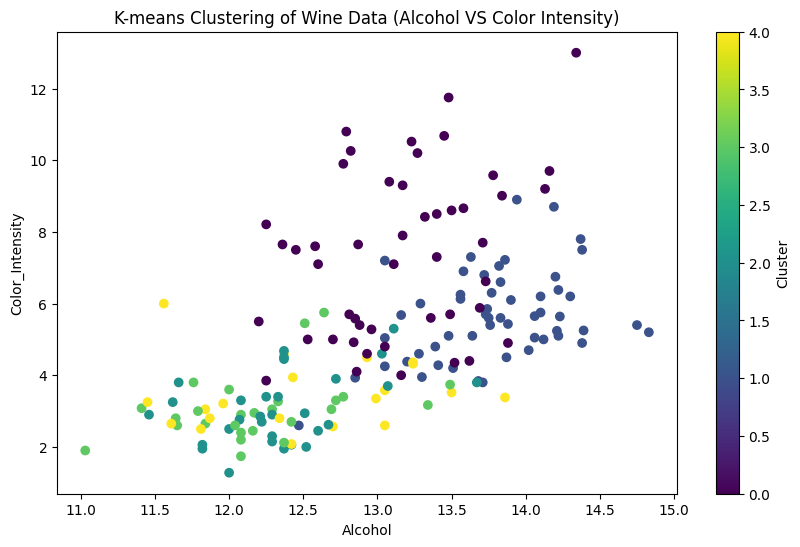

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means Clustering of Wine Data (Alcohol vs Malic Acid)')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Flavanoids'], df['Color_Intensity'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Flavanoids')
plt.ylabel('Color Intensity')
plt.title('K-means Clustering of Wine Data (Flavanoids vs Color Intensity)')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Phenols'], df['Alcohol'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Total Phenols')
plt.ylabel('Alcohol')
plt.title('K-means Clustering of Wine Data (Total Phenols vs Alcohol)')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Alcohol'], df['Color_Intensity'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.title('K-means Clustering of Wine Data (Alcohol VS Color Intensity)')
plt.colorbar(label='Cluster')
plt.show()

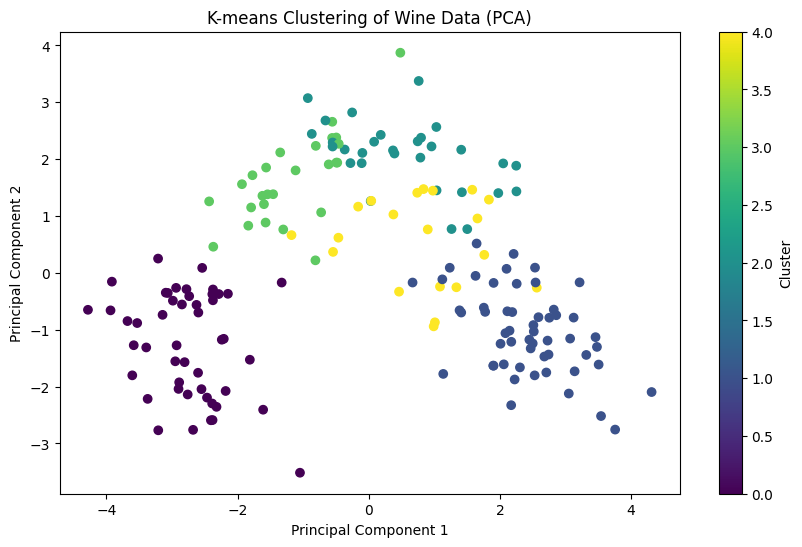

In [22]:
from sklearn.decomposition import PCA

# Reduce the dataset to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# 2D plot of the principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Wine Data (PCA)')
plt.colorbar(label='Cluster')
plt.show()


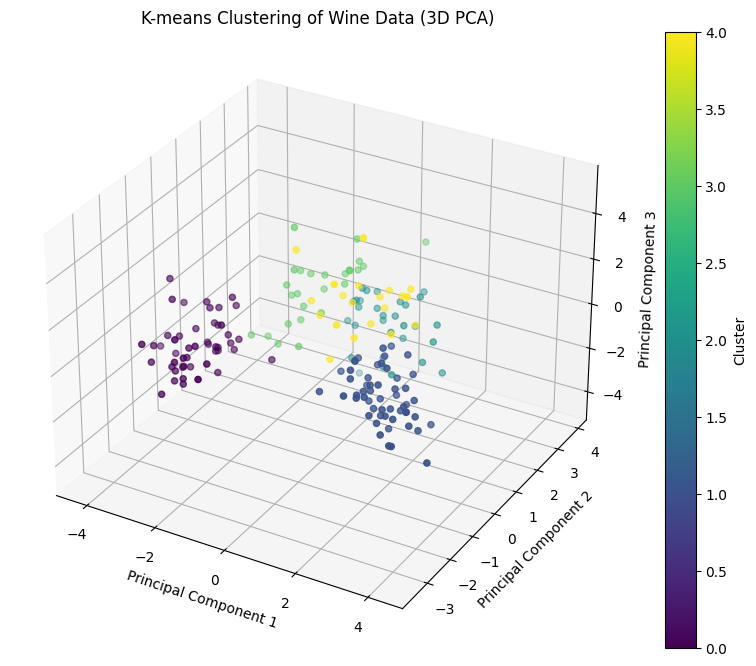

In [21]:
from sklearn.decomposition import PCA

# Reduce the dataset to 2 principal components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = df['Cluster']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with colors corresponding to their cluster
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis', marker='o')

# Set labels for axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set plot title
ax.set_title('K-means Clustering of Wine Data (3D PCA)')

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, label='Cluster')

# Show plot
plt.show()